In [68]:
import pandas as pd

In [69]:
# store file in two seperate variables (df2 will be dataframe we manipulate)
df = pd.read_csv('/kaggle/input/fitness-analysis/fitness analysis.csv')
df2 = pd.read_csv('/kaggle/input/fitness-analysis/fitness analysis.csv')
df.head(3)


,Timestamp,Your name,Your gender,Your age,How important is exercise to you ?,How do you describe your current level of fitness ?,How often do you exercise?,"What barriers, if any, prevent you from exercising more regularly? (Please select all that apply)",What form(s) of exercise do you currently participate in ? (Please select all that apply),Do you exercise ___________ ?,What time if the day do you prefer to exercise?,How long do you spend exercising per day ?,Would you say you eat a healthy balanced diet ?,"What prevents you from eating a healthy balanced diet, If any? (Please select all that apply)",How healthy do you consider yourself?,Have you ever recommended your friends to follow a fitness routine?,Have you ever purchased a fitness equipment?,What motivates you to exercise? (Please select all that applies )
0,2019/07/03 11:48:07 PM GMT+5:30,Parkavi,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,2019/07/03 11:51:22 PM GMT+5:30,Nithilaa,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...
2,2019/07/03 11:56:28 PM GMT+5:30,Karunya v,Female,15 to 18,3,Good,1 to 2 times a week,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,Yes,Yes,I want to be fit


In [70]:
# get count of duplicate rows
duplicates = len(df)-len(df.drop_duplicates())
print("Duplicate rows: " + str(duplicates))

Duplicate rows: 0


In [71]:
# check for missing values
null = df.isnull().sum()
null

Timestamp                                                                                                                0
Your name                                                                                                                0
Your gender                                                                                                              0
Your age                                                                                                                 0
How important is exercise to you ?                                                                                       0
How do you describe your current level of fitness ?                                                                      0
How often do you exercise?                                                                                               0
What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply)              0
What form(s) of 

In [72]:
# inspect column names (will be changing)
list(df.columns.values)

['Timestamp',
 'Your name ',
 'Your gender ',
 'Your age ',
 'How important is exercise to you ?',
 'How do you describe your current level of fitness ?',
 'How often do you exercise?',
 'What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply)',
 'What form(s) of exercise do you currently participate in ?                        (Please select all that apply)',
 'Do you exercise ___________ ?',
 'What time if the day do you prefer to exercise?',
 'How long do you spend exercising per day ?',
 'Would you say you eat a healthy balanced diet ?',
 'What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)',
 'How healthy do you consider yourself?',
 'Have you ever recommended your friends to follow a fitness routine?',
 'Have you ever purchased a fitness equipment?',
 'What motivates you to exercise?         (Please select all that applies )']

In [73]:
# change data types
df2 = df2.convert_dtypes()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 18 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                 --------------  ----- 
 0   Timestamp                                                                                                              545 non-null    string
 1   Your name                                                                                                              545 non-null    string
 2   Your gender                                                                                                            545 non-null    string
 3   Your age                                                                                                               545 non-null    string
 4   How impo

In [74]:
# Define dictionary to change column names
df2.rename(columns={
    'Your name ': 'Name',
    'Your gender ': 'Gender',
    'Your age ': 'Age_Group',
    'How important is exercise to you ?': 'Exercise_Importance',
    'How do you describe your current level of fitness ?': 'Fitness_Level',
    'How often do you exercise?': 'Frequency_Week',
    'What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply)': 'Barriers',
    'What form(s) of exercise do you currently participate in ?                        (Please select all that apply)': 'Exercise_Forms',
    'Do you exercise ___________ ?': 'Exercise_With_Others',
    'What time if the day do you prefer to exercise?': 'Time_Preference',
    'How long do you spend exercising per day ?': 'Duration',
    'Would you say you eat a healthy balanced diet ?': 'Diet_Healthy',
    'What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)': 'Diet_Barriers',
    'How healthy do you consider yourself?': 'Self_Health_Rating',
    'Have you ever recommended your friends to follow a fitness routine?': 'Recommend_Friends',
    'Have you ever purchased a fitness equipment?': 'Purchased_Equipment',
    'What motivates you to exercise?         (Please select all that applies )': 'Motivation'}, inplace=True)

In [75]:
# drop unneccesary columns
df2 = df2.drop('Timestamp',axis = 1)
df2 = df2.drop('Name',axis = 1)
df2.head(2)

,Gender,Age_Group,Exercise_Importance,Fitness_Level,Frequency_Week,Barriers,Exercise_Forms,Exercise_With_Others,Time_Preference,Duration,Diet_Healthy,Diet_Barriers,Self_Health_Rating,Recommend_Friends,Purchased_Equipment,Motivation
0,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...


In [76]:
# Want to restructure fitness level column so its easier to make calculations
df2['Fitness_Level'].unique()

<StringArray>
['Good', 'Very good', 'Unfit', 'Average', 'Perfect']
Length: 5, dtype: string

In [77]:
# change fitness levels to integer values
fitness_level_mapping = {
    'Unfit': 1,
    'Average': 2,
    'Good': 3,
    'Very good': 4,
    'Perfect': 5
}

# Map the 'Fitness_Level' column using the defined mapping
df2['Fitness_Level'] = df2['Fitness_Level'].map(fitness_level_mapping)

# Change the data type of the 'Fitness_Level' column to integer
df2['Fitness_Level'] = df2['Fitness_Level'].astype(int)


In [78]:
df2['Frequency_Week'].unique()

<StringArray>
[              'Never', '1 to 2 times a week', '3 to 4 times a week',
            'Everyday', '2 to 3 times a week', '5 to 6 times a week']
Length: 6, dtype: string

In [79]:
# change frequency to integer values (used in form of "at least [1(once), 2(twice), etc] a week")

frequency_level_mapping = {
    'Never': 0,
    '1 to 2 times a week': 1,
    '2 to 3 times a week': 2,
    '3 to 4 times a week': 3,
    '5 to 6 times a week': 4,
    'Everyday': 5
}

# Map the 'Fitness_Level' column using the defined mapping
df2['Frequency_Week'] = df2['Frequency_Week'].map(frequency_level_mapping)

# Change the data type of the 'Fitness_Level' column to integer
df2['Frequency_Week'] = df2['Frequency_Week'].astype(int)

In [80]:
# Define a mapping of 'No' to 0 and 'Yes' to 1 (also change data types)
yes_no_mapping = {'No': 0, 'Yes': 1}

# Apply mapping to neccessary columns
df2['Recommend_Friends'] = df2['Recommend_Friends'].map(yes_no_mapping)
df2['Recommend_Friends'] = df2['Recommend_Friends'].astype(int)

df2['Purchased_Equipment'] = df2['Purchased_Equipment'].map(yes_no_mapping)
df2['Purchased_Equipment'] = df2['Purchased_Equipment'].astype(int)


In [81]:
# save clean file to desktop
df2.to_csv('Fitness(Clean).csv')

In [82]:
#### Analysis

In [83]:
# gender percentage
gender = df2['Gender'].value_counts(normalize=True) * 100

print("Women: {:.1f}%".format(gender.get('Female', 0)))
print("Men: {:.1f}%".format(gender.get('Male', 0)))


Women: 55.4%
Men: 44.6%


In [84]:
# summary for numerical columns
df2.describe()

,Exercise_Importance,Fitness_Level,Frequency_Week,Self_Health_Rating,Recommend_Friends,Purchased_Equipment
count,545.0,545.000000,545.000000,545.0,545.000000,545.000000
mean,3.884404,2.625688,1.974312,3.258716,0.644037,0.376147
std,0.9979,0.938984,1.681233,0.793495,0.479244,0.484863
min,1.0,1.000000,0.000000,1.0,0.000000,0.000000
25%,3.0,2.000000,1.000000,3.0,0.000000,0.000000
50%,4.0,3.000000,2.000000,3.0,1.000000,0.000000
75%,5.0,3.000000,3.000000,4.0,1.000000,1.000000
max,5.0,5.000000,5.000000,5.0,1.000000,1.000000


In [85]:
# check unique value count in categorical columns
categorical_columns = ['Gender', 'Age_Group', 'Exercise_With_Others', 'Time_Preference', 'Diet_Healthy', 'Purchased_Equipment', 'Motivation']
unique_counts = df2[categorical_columns].nunique()
print(unique_counts)

Gender                   2
Age_Group                5
Exercise_With_Others     5
Time_Preference          3
Diet_Healthy             3
Purchased_Equipment      2
Motivation              68
dtype: int64


In [86]:
# find overall stats/value count of categorical values within database
frequency_analysis = {}
for column in categorical_columns:
    frequency_analysis[column] = df2[column].value_counts()
    
print(frequency_analysis)


{'Gender': Female    302
Male      243
Name: Gender, dtype: Int64, 'Age_Group': 19 to 25        236
15 to 18        167
40 and above     85
30 to 40         37
26 to 30         20
Name: Age_Group, dtype: Int64, 'Exercise_With_Others': Alone                         289
I don't really exercise        89
With a friend                  85
With a group                   66
Within a class environment     16
Name: Exercise_With_Others, dtype: Int64, 'Time_Preference': Early morning    300
Evening          235
Afternoon         10
Name: Time_Preference, dtype: Int64, 'Diet_Healthy': Not always    327
Yes           115
No            103
Name: Diet_Healthy, dtype: Int64, 'Purchased_Equipment': 0    340
1    205
Name: Purchased_Equipment, dtype: int64, 'Motivation': I want to be fit                                     88
I want to be fit;I want to lose weight               43
I want to lose weight                                43
I'm sorry ... I'm not really interested in exe...    36
I want to 

In [87]:
# inspect barrier column to determine how we will adjust this to be able to analyze more efficiently
## will continue when I find how to categorize this without jeapordizing integrity
# df2['Barriers'].unique() 
# for now the code below is a start
df2['Barriers'].str.split(';', expand=True).stack().value_counts()

I don't have enough time                 290
I can't stay motivated                   178
I'll become too tired                    112
I exercise regularly with no barriers     67
I don't really enjoy exercising           59
I have an injury                          31
Laziness                                   3
Laziness mostly                            2
Laziness                                   2
No gym near me                             1
Less stamina                               1
I am not regular in anything               1
I am lazy                                  1
Lazy                                       1
My friends don't come                      1
I'm too lazy                               1
Allergies                                  1
I always busy with my regular works        1
Travel                                     1
Travel time I skip                         1
dtype: Int64

In [88]:
df2.head()

,Gender,Age_Group,Exercise_Importance,Fitness_Level,Frequency_Week,Barriers,Exercise_Forms,Exercise_With_Others,Time_Preference,Duration,Diet_Healthy,Diet_Barriers,Self_Health_Rating,Recommend_Friends,Purchased_Equipment,Motivation
0,Female,19 to 25,2,3,0,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,1,0,I'm sorry ... I'm not really interested in exe...
1,Female,19 to 25,4,4,0,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,1,0,I want to be fit;I want to be flexible;I want ...
2,Female,15 to 18,3,3,1,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,1,1,I want to be fit
3,Female,15 to 18,4,3,3,I don't have enough time,Walking or jogging;Gym;Lifting weights,Alone,Evening,1 hour,Yes,Temptation and cravings,4,1,0,I want to be fit;I want to lose weight
4,Female,19 to 25,3,1,0,I can't stay motivated,I don't really exercise,I don't really exercise,Evening,I don't really exercise,Yes,Ease of access to fast food;Temptation and cra...,4,1,0,I want to be fit


In [89]:
# Visualizations
import seaborn as sb
import matplotlib.pyplot as plt

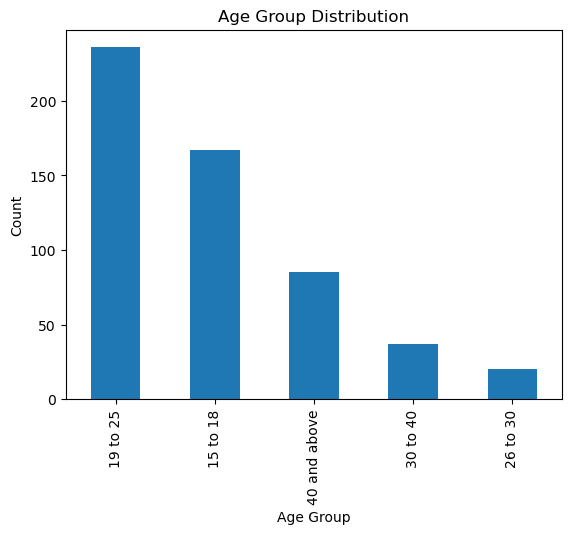

In [90]:
# Plot a bar chart for age group distribution
df2['Age_Group'].value_counts().plot(kind='bar')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


In [91]:
# as percentages
df2.Age_Group.value_counts(True)*100

19 to 25        43.302752
15 to 18        30.642202
40 and above     15.59633
30 to 40         6.788991
26 to 30         3.669725
Name: Age_Group, dtype: Float64

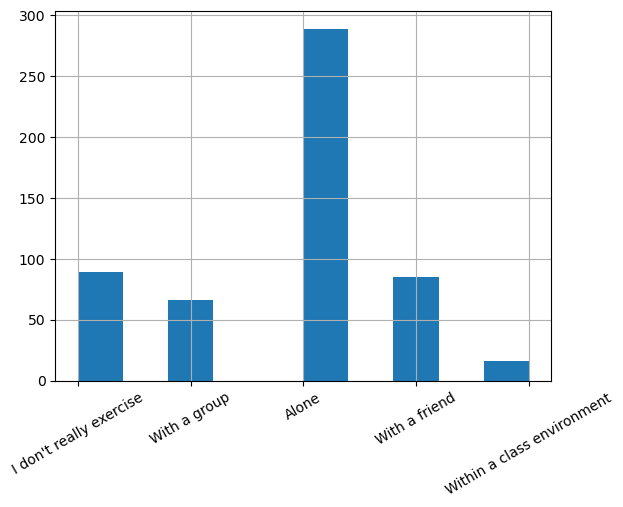

In [92]:
# 
df2['Exercise_With_Others'].hist();
plt.xticks(rotation=30, horizontalalignment="center");

In [93]:
# as percentages
df2.Exercise_With_Others.value_counts(True)*100

Alone                         53.027523
I don't really exercise       16.330275
With a friend                  15.59633
With a group                  12.110092
Within a class environment      2.93578
Name: Exercise_With_Others, dtype: Float64

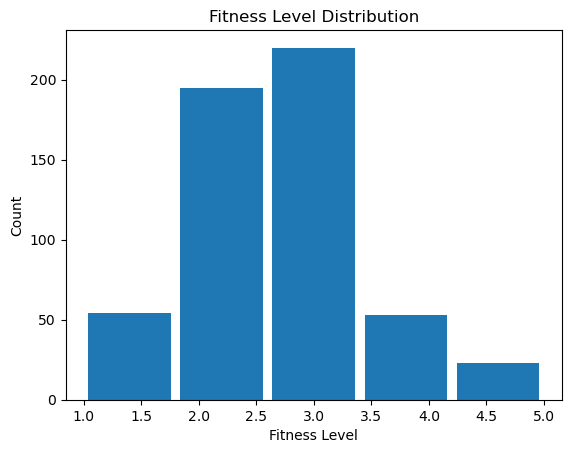

In [94]:
# Plot histogram for fitness level distribution
df2['Fitness_Level'].plot(kind='hist', bins=5, rwidth=0.9)
plt.title('Fitness Level Distribution')
plt.xlabel('Fitness Level')
plt.ylabel('Count')
plt.show()


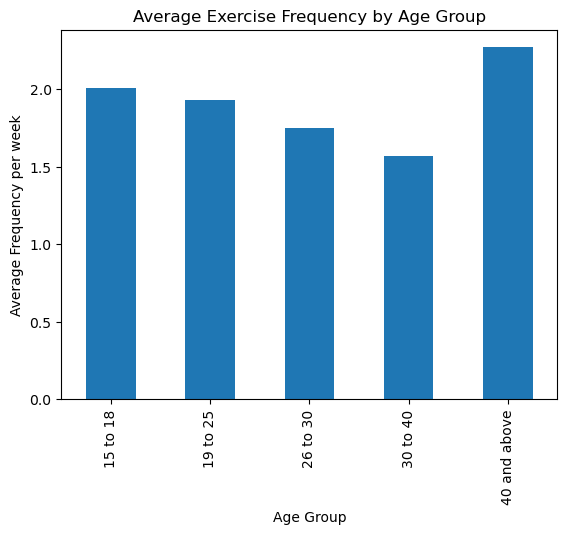

In [95]:
# Average exercise frequency based on age group
exercise_by_age = df2.groupby('Age_Group')['Frequency_Week'].mean()

# Plot a bar chart for average exercise frequency by age group
exercise_by_age.plot(kind='bar')
plt.title('Average Exercise Frequency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Frequency per week')
plt.show()


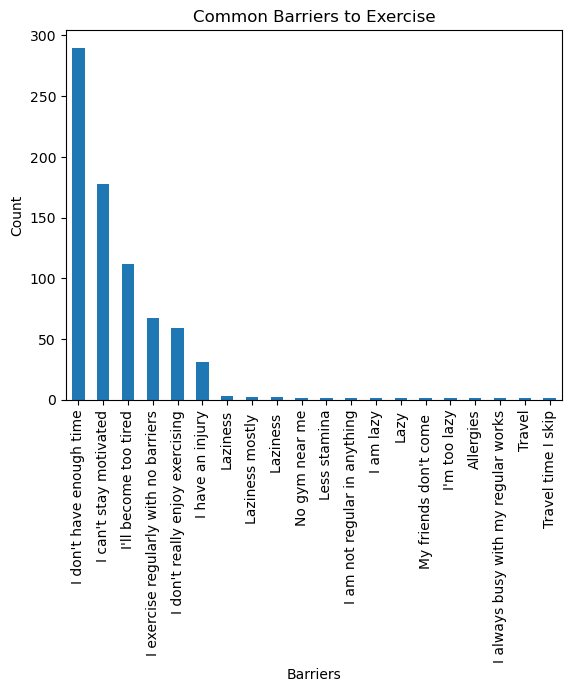

In [96]:
# What are the most common barriers to exercise
barriers = df2['Barriers'].str.split(';', expand=True).stack().value_counts()

# Visualize to get stats and see if it solves the variety within this column
barriers.plot(kind='bar')
plt.title('Common Barriers to Exercise')
plt.xlabel('Barriers')
plt.ylabel('Count')
plt.show()


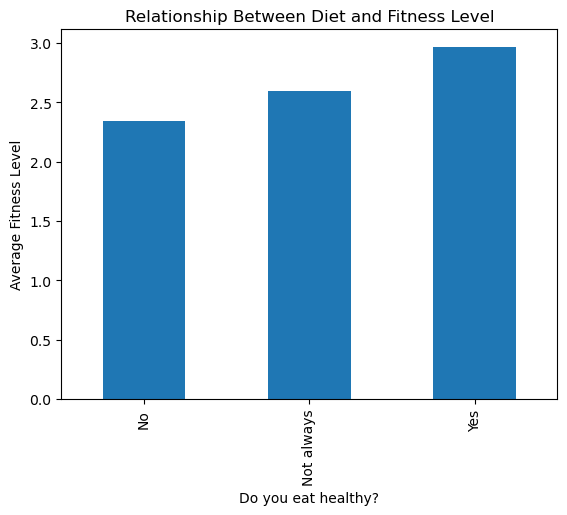

In [97]:
# Find correlation between diet and fitness level
fitness_by_diet = df2.groupby('Diet_Healthy')['Fitness_Level'].mean()

# Plot a bar chart for average fitness level by diet rating
fitness_by_diet.plot(kind='bar')
plt.title('Relationship Between Diet and Fitness Level')
plt.xlabel('Do you eat healthy?')
plt.ylabel('Average Fitness Level')
plt.show()


In [98]:
df2.head()

,Gender,Age_Group,Exercise_Importance,Fitness_Level,Frequency_Week,Barriers,Exercise_Forms,Exercise_With_Others,Time_Preference,Duration,Diet_Healthy,Diet_Barriers,Self_Health_Rating,Recommend_Friends,Purchased_Equipment,Motivation
0,Female,19 to 25,2,3,0,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,1,0,I'm sorry ... I'm not really interested in exe...
1,Female,19 to 25,4,4,0,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,1,0,I want to be fit;I want to be flexible;I want ...
2,Female,15 to 18,3,3,1,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,1,1,I want to be fit
3,Female,15 to 18,4,3,3,I don't have enough time,Walking or jogging;Gym;Lifting weights,Alone,Evening,1 hour,Yes,Temptation and cravings,4,1,0,I want to be fit;I want to lose weight
4,Female,19 to 25,3,1,0,I can't stay motivated,I don't really exercise,I don't really exercise,Evening,I don't really exercise,Yes,Ease of access to fast food;Temptation and cra...,4,1,0,I want to be fit
